<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Time_Series_Models(4_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/decline_count.csv")
df

,Time,Decline_count,Total_Count,Decline_percentage
0,27-01-2017 18:42,36,654,6%
1,27-01-2017 18:43,14,522,3%
2,27-01-2017 18:44,7,348,2%
3,27-01-2017 18:45,18,725,2%
4,27-01-2017 18:46,16,72,22%
...,...,...,...,...
965,28-01-2017 10:47,29,285,10%
966,28-01-2017 10:48,10,558,2%
967,28-01-2017 10:49,11,268,4%
968,28-01-2017 10:50,3,645,0%


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime



In [4]:
# Preprocess the data
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)  # Convert Time to datetime
df['Decline_percentage'] = df['Decline_percentage'].str.rstrip('%').astype('float') / 100.0  # Convert to float

In [5]:
# Feature Engineering: Convert Time to a numerical feature
df['Time_ordinal'] = df['Time'].apply(lambda x: x.toordinal())

In [6]:
# Define features and target
X = df[['Time_ordinal']]  # Features
y = df['Decline_percentage']  # Target

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [10]:
# Validation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 0.008699872976923704, RMSE: 0.09327310961324119


In [11]:
# Predict for a new date
def predict_decline_percentage(date_str):
    date = datetime.strptime(date_str, '%d-%m-%Y %H:%M')
    date_ordinal = date.toordinal()
    pred_percentage = model.predict([[date_ordinal]])
    return pred_percentage[0]

# Example prediction
print(predict_decline_percentage("28-01-2017 18:46"))

0.10065510597269167


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


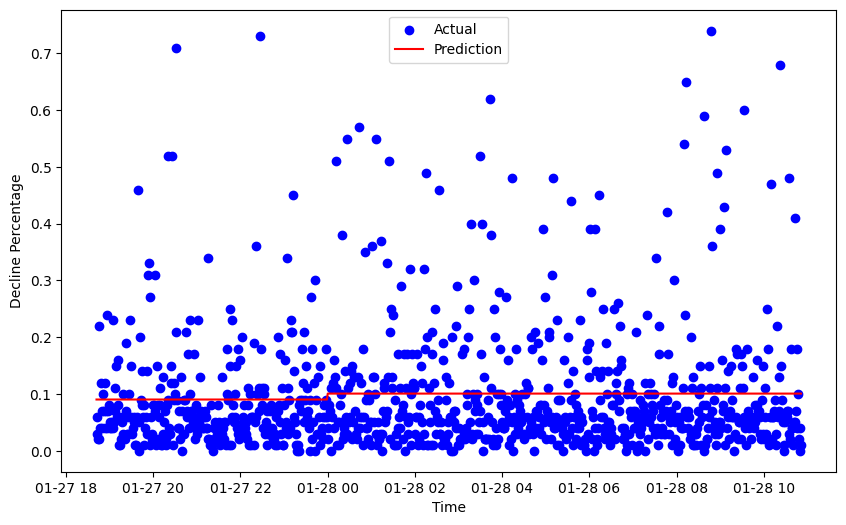

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], y, color='blue', label='Actual')
plt.plot(df['Time'], model.predict(X), color='red', label='Prediction')
plt.xlabel('Time')
plt.ylabel('Decline Percentage')
plt.legend()
plt.show()

In [14]:
# Predict for a new date and return the prediction in percentage format
def predict_decline_percentage(date_str):
    date = datetime.strptime(date_str, '%d-%m-%Y %H:%M')
    date_ordinal = date.toordinal()
    pred_percentage = model.predict([[date_ordinal]]) * 100  # Multiply by 100 to convert to percentage
    return pred_percentage[0]

# Example prediction
prediction_percentage = predict_decline_percentage("27-01-2017 18:42")
print(f"{prediction_percentage:.2f}%")

9.02%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


MSE (Mean Squared Error): 0.0087 indicates the average squared difference between the estimated values and the actual value. It's a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
RMSE (Root Mean Squared Error): 0.0933 is the square root of the mean square error. It measures the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Given these results, your model has a relatively low error, suggesting that it performs decently in predicting the Decline_percentage based on the Time. However, remember that linear regression models assume a linear relationship between the features and the target. If your data contains complex patterns or seasonal effects not captured by the model, you might observe limitations in the model's predictive capabilities.

For further improvement, consider exploring other models and adding more features that could help capture the trends and seasonality in your data, such as day of the week, month, or using previous time steps as features if you move to models that can handle sequential data (like ARIMA or LSTM for time series forecasting).


#ARMIA

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
df = pd.read_csv("/content/decline_count.csv")
df

,Time,Decline_count,Total_Count,Decline_percentage
0,27-01-2017 18:42,36,654,6%
1,27-01-2017 18:43,14,522,3%
2,27-01-2017 18:44,7,348,2%
3,27-01-2017 18:45,18,725,2%
4,27-01-2017 18:46,16,72,22%
...,...,...,...,...
965,28-01-2017 10:47,29,285,10%
966,28-01-2017 10:48,10,558,2%
967,28-01-2017 10:49,11,268,4%
968,28-01-2017 10:50,3,645,0%


In [17]:
# Assuming df is your DataFrame after loading the CSV
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df.set_index('Time', inplace=True)  # Set the Time column as the index

In [18]:
# Convert Decline_percentage to float
df['Decline_percentage'] = df['Decline_percentage'].str.rstrip('%').astype('float') / 100.0

In [19]:
# Since ARIMA needs a univariate series, we'll use only 'Decline_percentage' for modeling
series = df['Decline_percentage']

In [20]:
# Split the dataset into train and test
split_point = int(len(series) * 0.8)
train, test = series[0:split_point], series[split_point:]

In [29]:
# Define the model
model = ARIMA(train, order=(5,1,0))  # Adjust the order (p,d,q) based on your data and experimentation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [30]:
# Fit the model
model_fit = model.fit()

In [31]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [32]:
# Compute MSE and RMSE
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.01808596301545598, RMSE: 0.13448406231020826


In [33]:
# Function to predict decline percentage for a new date
def predict_decline_percentage_arima(date_str, model_fit):
    date = datetime.strptime(date_str, '%d-%m-%Y %H:%M')
    # Assuming 'df' is your DataFrame and has 'Time' as index in datetime format
    idx = (date - df.index[0]).days
    forecast = model_fit.forecast(steps=idx)[-1]
    return forecast * 100  # Convert to percentage

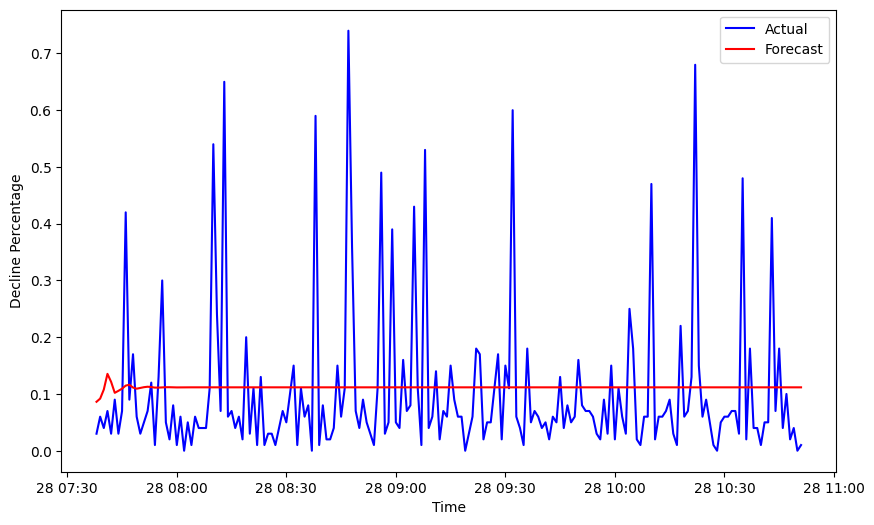

In [34]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(test.index, test, color='blue', label='Actual')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Decline Percentage')
plt.legend()
plt.show()

In [35]:
# Predict for a new date (ensure the date is within the model's forecastable range)
print(f"Predicted Decline Percentage: {predict_decline_percentage_arima('28-01-2017 18:46', model_fit):.2f}%")

Predicted Decline Percentage: 8.62%


The parameters (p), (d), and (q) in the ARIMA model stand for the following components:

(p) - The number of lag observations included in the model, also known as the lag order. This represents the AR (autoregression) part and indicates the number of lagged (previous) data points the model will consider to predict the current value.

(d) - The degree of differencing. This represents the number of times the raw observations are differenced to make the time series stationary. Stationarity is a key aspect of time series analysis, as many models assume that the series is not showing trends or seasonal patterns and has constant variance over time.

(q) - The size of the moving average window, also known as the order of moving average. This represents the MA (moving average) part and indicates how many lagged forecast errors the model will consider.

#FaceBook Model

In [36]:
pip install fbprophet matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
 

In [37]:
df = pd.read_csv("/content/decline_count.csv")
df

,Time,Decline_count,Total_Count,Decline_percentage
0,27-01-2017 18:42,36,654,6%
1,27-01-2017 18:43,14,522,3%
2,27-01-2017 18:44,7,348,2%
3,27-01-2017 18:45,18,725,2%
4,27-01-2017 18:46,16,72,22%
...,...,...,...,...
965,28-01-2017 10:47,29,285,10%
966,28-01-2017 10:48,10,558,2%
967,28-01-2017 10:49,11,268,4%
968,28-01-2017 10:50,3,645,0%


In [38]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [39]:
# Convert 'Time' to datetime format and 'Decline_percentage' to a float
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Decline_percentage'] = df['Decline_percentage'].str.rstrip('%').astype('float')

In [40]:
# Prepare DataFrame for Prophet
prophet_df = df[['Time', 'Decline_percentage']].rename(columns={'Time': 'ds', 'Decline_percentage': 'y'})

In [41]:
# Since no test dataset was specified, we'll use the last 20% of the data as a test set
test_size = int(len(prophet_df) * 0.2)
train_df = prophet_df[:-test_size]
test_df = prophet_df[-test_size:]

In [42]:
model = Prophet(daily_seasonality=True)
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xngn7bf/59th5w1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xngn7bf/ozng4m0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6399', 'data', 'file=/tmp/tmp0xngn7bf/59th5w1w.json', 'init=/tmp/tmp0xngn7bf/ozng4m0t.json', 'output', 'file=/tmp/tmp0xngn7bf/prophet_modelz_49fo7e/prophet_model-20240418054201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
# Create future DataFrame
future_dates = model.make_future_dataframe(periods=test_size)

# Forecast
forecast = model.predict(future_dates)


In [45]:
# Extract forecasted values corresponding to the test set dates
forecasted_test = forecast[-len(test_df):]

In [50]:
# Assuming 'test_df' contains the actual values and 'forecasted_test' contains the predictions

# Calculate MSE
mse = mean_squared_error(test_df['y'], forecasted_test['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 246748.6527885917
Root Mean Squared Error (RMSE): 496.73801222434315


In [49]:
# Example: Predicting for a new date
new_date = pd.DataFrame({
    'ds': pd.to_datetime(['27-01-2017 18:42'])  # Example new date; adjust as needed
})

forecast_new_date = model.predict(new_date)

print(f"Predicted `Decline_percentage` for {new_date['ds'][0]}: {forecast_new_date['yhat'].iloc[0]}")


Predicted `Decline_percentage` for 2017-01-27 18:42:00: 7.799303057344271


<ipython-input-49-36f44cb33ff0>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  'ds': pd.to_datetime(['27-01-2017 18:42'])  # Example new date; adjust as needed


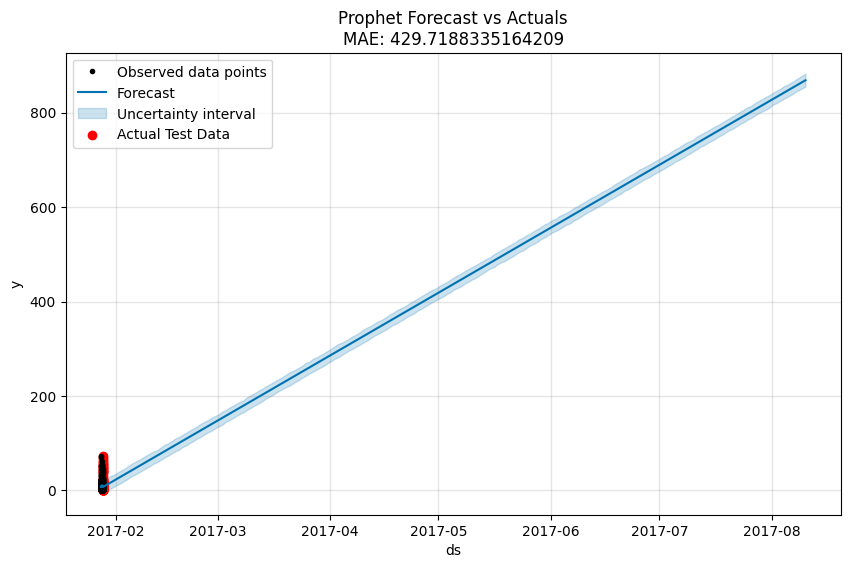

In [47]:
# Plot the forecast with the actual test data
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.scatter(test_df['ds'], test_df['y'], color='red', label='Actual Test Data')
plt.title(f'Prophet Forecast vs Actuals\nMAE: {mae}')
plt.legend()
plt.show()


#XG Boost

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
df = pd.read_csv("/content/decline_count.csv")
df

,Time,Decline_count,Total_Count,Decline_percentage
0,27-01-2017 18:42,36,654,6%
1,27-01-2017 18:43,14,522,3%
2,27-01-2017 18:44,7,348,2%
3,27-01-2017 18:45,18,725,2%
4,27-01-2017 18:46,16,72,22%
...,...,...,...,...
965,28-01-2017 10:47,29,285,10%
966,28-01-2017 10:48,10,558,2%
967,28-01-2017 10:49,11,268,4%
968,28-01-2017 10:50,3,645,0%


In [53]:
# Assuming 'df' is your DataFrame
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Decline_percentage'] = df['Decline_percentage'].str.rstrip('%').astype('float') / 100

# Extract datetime features
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute

In [61]:
# Prepare the features and target variable
X = df[['year', 'month', 'day', 'hour', 'minute']]
y = df['Decline_percentage']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Initialize and train the XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 100)

model.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [64]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.008775550133938933
Root Mean Squared Error (RMSE): 0.09367790632768717


In [65]:
# Example: Prepare new data
new_data = pd.DataFrame({
    'Time': pd.to_datetime(['28-01-2017 18:45']),  # New time
    # Add other necessary columns here
})

# Extract datetime features from new data in the same way as done for training data
new_data['year'] = new_data['Time'].dt.year
new_data['month'] = new_data['Time'].dt.month
new_data['day'] = new_data['Time'].dt.day
new_data['hour'] = new_data['Time'].dt.hour
new_data['minute'] = new_data['Time'].dt.minute


<ipython-input-65-c13c4f012b42>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  'Time': pd.to_datetime(['28-01-2017 18:45']),  # New time


In [66]:
# Assuming 'new_data' is prepared and includes the necessary features as done for the training data

# Select the same features as used in the model training
features_new_data = new_data[['year', 'month', 'day', 'hour', 'minute']]

# Predict using the trained XGBoost model
new_data_predictions = model.predict(features_new_data)

# Display the predictions
print(f"Predicted Decline_percentage: {new_data_predictions}")


Predicted Decline_percentage: [0.0972036]


In [67]:
import matplotlib.pyplot as plt

# Assuming 'X_test' already includes 'year', 'month', 'day', 'hour', 'minute' columns
# Create a datetime column in 'X_test' for plotting
X_test['datetime'] = pd.to_datetime(X_test[['year', 'month', 'day', 'hour', 'minute']])

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'datetime': X_test['datetime'],
    'actual': y_test,
    'predicted': y_pred
})

# Sorting the DataFrame by datetime just in case
results_df.sort_values('datetime', inplace=True)


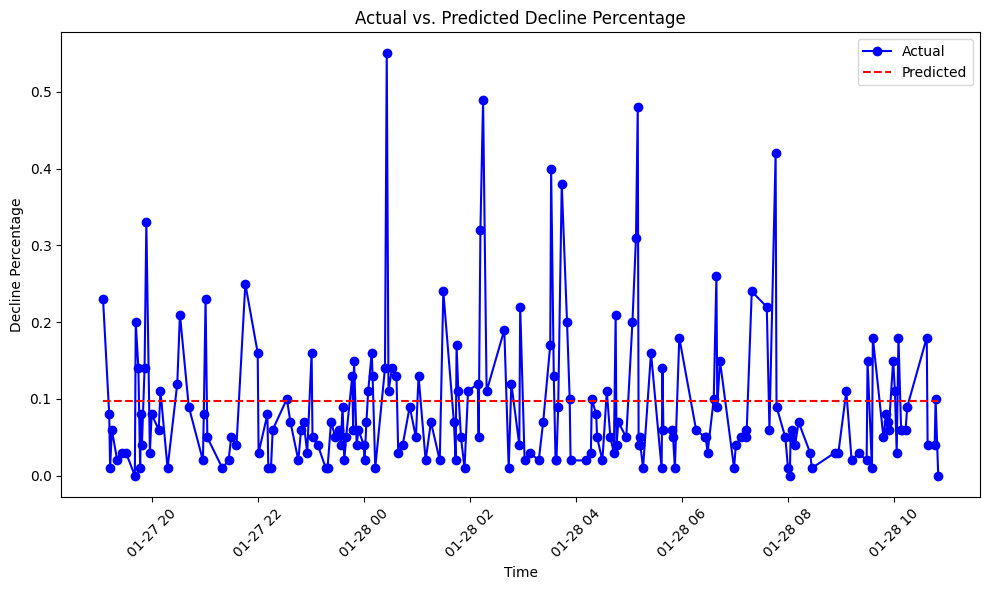

In [68]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(results_df['datetime'], results_df['actual'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(results_df['datetime'], results_df['predicted'], label='Predicted', color='red', linestyle='--')

plt.title('Actual vs. Predicted Decline Percentage')
plt.xlabel('Time')
plt.ylabel('Decline Percentage')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()

plt.show()


Here's a summary of the models and their respective MSE and RMSE values:

**Linear Regression**

MSE: 0.008699872976923704

RMSE: 0.09327310961324119

**ARIMA**

MSE: 0.01808596301545598

RMSE: 0.13448406231020826

**Facebook Prophet Model**

MSE: 246748.6527885917

RMSE: 496.73801222434315

**XGBoost Model**

MSE: 0.008775550133938933

RMSE: 0.09367790632768717

Based on the given MSE and RMSE values:

**The Linear Regression model has the lowest MSE and RMSE values among the four models, indicating it performs the best in terms of minimizing the average squared difference between the estimated values and the actual value, as well as offering the lowest average error magnitude (RMSE)**.
The XGBoost model shows a very close performance to the Linear Regression model, with slightly higher MSE and RMSE values. Given the complexity and flexibility of XGBoost, there might be room for hyperparameter tuning to further improve its performance.
The ARIMA model has higher MSE and RMSE values than both the Linear Regression and XGBoost models, making it the third in terms of performance based on these metrics.
The Facebook Prophet model has significantly higher MSE and RMSE values compared to the other models, indicating it performs the worst on this particular dataset according to these metrics. This could be due to various factors including data characteristics and model parameter settings.

In conclusion, based on the provided metrics, the Linear Regression model is doing the best job of forecasting in this context, closely followed by the XGBoost model. However, it's important to consider other factors such as data characteristics, model assumptions, and potential overfitting when making a final decision on model selection.
